# Case Study 1

#### Dhruba Dey, Josh Eysenbach, Anish Patel, Sreeni Prabhala
#### May 9, 2021

### Abstract

In this case study, we attempt to find what elements and characteristics correlate to materials that constitute good new superconductors by identifying positive relationships with high critical temperatures. This is done by regressing the critical temperature of many superconductors of varying elemental composition based on a range of quantitative material characteristics.

### 1   Introduction

A superconductor is a material that at a sufficiently low enough temperature will exhibit extremely low to no electrical resistance, resulting in infinite conductivity. This still little understood phenomenon at which a material reaches the physical state of superconductivity occurs suddenly at a temperature known as the *critical temperature*. The first superconductor discovered was Mercury (Hg) by Dutch physicist Heike Kamerlingh Onnes in 1911 at a critical temperature of 4 degrees Kelvin (or -424 degrees Fahrenheit). [1] Since then, researchers have discovered and developed many superconducting compounds including metal alloys and ceramics with the goal of finding materials with higher critical temperatures (or ideally, those as close to room temperature as possible), as the requirement of extreme cooling is both difficult and expensive to achieve.

With this goal in mind, the task for this case study involves predicting the critical temperature of superconductors given a myriad of quantitative material characteristics and the elements that make up the compound tested. The dataset provided contains 21,263 observations of materials. The information for these observations include the ratios of 77 different elements that could be included and the measurements for 81 quantitative material characteristics of each compound. Ultimately, the goal is to find which combination of these variables can positively correlate most with increased critical temperature to define what traits are indicative of useful new superconductors.

### 2   Methods

There were two files originally provided with one containing measurements of material characteristics and another with the elemental compositions; these two files were combined for use in this analysis along with the target response variable, *critical temperature*. As indicated by the purveyor of the data used in this analysis, the data contains no missing values for any of the measurements. In addition, we did not check for outliers because we were not sure whether we should eliminate any outliers from the dataset given its scientific nature, where the quality of data collection is of paramount importance.

The client is asking for a model which will help them determine which individual features contribute most to increases in critical temperature. Therefore, linear regression is best for this case as the response variable is continuous. The data was first normalized in each regression run with the primary intent of simpler interpretability through direct comparisons of the resulting linear coefficients. The data was internally validated using 10-fold cross validation. 

After combination of the two data files, the 158 features to start with are far too many to comprehensively include in a effective linear model without issues with redundancy and overfitting. After initial exploration of the dataset, the linear model was developed by first using a LASSO algorithm to select the most pertinent variables, and then Ridge regression to fit the model using the smaller set of selected variables to reduce the chances of overfitting. In both LASSO and Ridge Regression, *alpha* (the shrinkage penalty) produces the effect of shrinking coefficients of less important variables closer to zero, and this effect is greater with higher values of *alpha*. Both the LASSO and Ridge modeling steps were optimized by determining the best value of the *alpha* hyperparameter that minimized mean square error.

One method we could have used was to investigate the correlations, group them appropriately, check the multi-collinearity, and keep the features which were most relevant from the scientific standpoint. Since we are not subject matter experts in this regard, we relied on the LASSO algorithm to shrink the coefficients of unimportant variables to zero and drastically reduce our included feature count by also eliminating those with resulting coefficients below a threshold of .01.

In Ridge regression the shrinkage penalty is similarly designed to shrink coefficients, but not completely to zero as in LASSO, so we used this algorithm second to reduce overfitting without eliminating more variables. The final model coefficients were then examined for statistical significance and compared for determining feature importance.

### 3   Results

The coefficients which represent the feature importance in the final linear model, and the summary table with important statistics are shown in the figures below. 

We started building our model with the notion to find the material composition that would allow the composite material in testing to achieve superconductivity. But it turned out that entropy is a key criteria that dictates the phenomenon of superconductivity. 

Another interesting result that we observed is only around 12 features, out of 158, comprising 8 materials, 3 entropy related factors, and the valence dominate the outcome. This could potentially provide the scientific community with some insight from this model to narrow down their research to a few key factors and elements.

From a p-value standpoint, most of the features are statistically significant besides “wtd_std_ThermalConductivity”. However, it has a very low coefficient and will not matter in the larger scheme. However,the researchers should look further into this feature to see whether it makes sense to be included in the model.

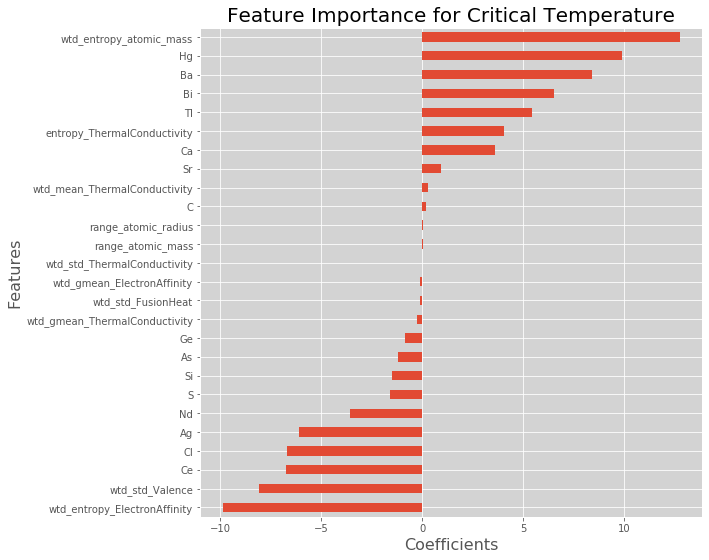

In [87]:
plt.style.use('ggplot')
weights = pd.Series(Final_model.coef_,index=X_new.columns).sort_values(ascending=True)
plt.figure(figsize=(9,9))
weights.plot(kind='barh').patch.set_facecolor('lightgrey')
plt.ylabel("Features", fontsize=16)
plt.xlabel("Coefficients", fontsize=16)
plt.title('Feature Importance for Critical Temperature', fontsize=20)
plt.show()

In [90]:
# p-values and summary statistics 
print("\n=========== SUMMARY ===========")
xlabels = X_train_new.columns
stats.summary(Final_model, X_train_new, y_train_new, xlabels)


=========== SUMMARY ===========
Residuals:
      Min       1Q  Median     3Q      Max
-208.6094 -10.9185  0.1687 9.4136 148.1172


Coefficients:
                                Estimate  Std. Error  t value   p value
_intercept                      6.381481    0.661809   9.6425  0.000000
wtd_entropy_atomic_mass        12.731542    0.745056  17.0880  0.000000
range_atomic_mass               0.032923    0.002830  11.6339  0.000000
range_atomic_radius             0.056247    0.002923  19.2449  0.000000
wtd_gmean_ElectronAffinity     -0.107330    0.003437 -31.2271  0.000000
wtd_entropy_ElectronAffinity   -9.861204    0.685702 -14.3812  0.000000
wtd_std_FusionHeat             -0.115258    0.020279  -5.6835  0.000000
wtd_mean_ThermalConductivity    0.279294    0.006988  39.9649  0.000000
wtd_gmean_ThermalConductivity  -0.281721    0.007812 -36.0603  0.000000
entropy_ThermalConductivity     4.065364    0.563843   7.2101  0.000000
wtd_std_ThermalConductivity    -0.002733    0.004759  -0.5743 

### 4   Conclusion

The variable *wtd_entropy_atomic_mass* has the highest positive coefficient in the model, indicating that its increase results in the most prominent increase in *critical_temp*, the desired effect in the discovery of new superconductors.

The features *wtd_entropy_ElectronAffinity* and *wtd_std_Valence* had the most negative coefficients in the model, indicating that increases in the values of these characteristics result in the greatest decrease in *critical_temp*, so materials that exhibit higher measurements for these features should be avoided.

The model also showed that increases in the elements Mercury (Hg) and Barium (Ba) in the compound composition resulted in the greatest increase in critical temperature, while increases in Chlorine (Cl), Silver (Ag), and Cerium (Ce) resulted in the greatest decreases in critical temperature. It would appear the use of Hg and Ba are favorable in the discovery of good new superconductors. 

We can conclude that these materials with the aforementioned characterisitics and elements should be pursued further by researchers with the intent of discovering new superconductors with higher critical temperatures.

### Appendix:   Code

In [4]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns
# import missingno as msno
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import scale 
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import StratifiedKFold
# from sklearn.linear_model import LinearRegression
#!pip install regressors

In [9]:
#import data - there are 2 files that line up row-wise that need to be combined:
df_t = pd.read_csv("https://raw.githubusercontent.com/jteysen/QTW/main/Data/train.csv")
df_m = pd.read_csv("https://raw.githubusercontent.com/jteysen/QTW/main/Data/unique_m.csv") #element list

In [10]:
df_m.shape

(21263, 88)

In [11]:
#check elements for exclusion - if all rows are zero for a column, drop it.
stats = df_m.describe()
drops = [c for c in stats.columns if stats[c]['max'] == 0.0]
df_m = df_m.drop(drops, axis = 1)
print("dropped columns: ", drops)

dropped columns:  ['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


In [12]:
#cleanup files before combining
#drop critical temp (duplicated in df_t) and material (unneeded) from element set
df_m2 = df_m.drop(['critical_temp', 'material'], axis = 1)

In [13]:
#combine two files into one df will all data
df = pd.concat([df_t, df_m2], axis=1)
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#show variable types
print("*note all counts are the same and add up to total rows; no missing data*")
df.info(verbose=True, null_counts=True)

*note all counts are the same and add up to total rows; no missing data*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 159 columns):
 #    Column                           Non-Null Count  Dtype  
---   ------                           --------------  -----  
 0    number_of_elements               21263 non-null  int64  
 1    mean_atomic_mass                 21263 non-null  float64
 2    wtd_mean_atomic_mass             21263 non-null  float64
 3    gmean_atomic_mass                21263 non-null  float64
 4    wtd_gmean_atomic_mass            21263 non-null  float64
 5    entropy_atomic_mass              21263 non-null  float64
 6    wtd_entropy_atomic_mass          21263 non-null  float64
 7    range_atomic_mass                21263 non-null  float64
 8    wtd_range_atomic_mass            21263 non-null  float64
 9    std_atomic_mass                  21263 non-null  float64
 10   wtd_std_atomic_mass              21263 non-null  float6

In [16]:
#summary stats
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,0.010424,0.038206,0.022512,0.061558,0.034108,0.020535,0.036663,0.047954,0.042461,0.201009
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,0.164628,1.177476,0.282265,0.864859,0.307888,0.717975,0.205846,0.272298,0.274365,0.655927
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,14.000000,97.240000,10.000000,45.000000,5.800000,64.000000,8.000000,7.000000,19.000000,14.000000


In [17]:
#verify in excel
# df.to_csv('combined_data_check.csv')
# df.to_csv(r'C:\Users\dey4d\OneDrive\Documents\Pythonfiles\combined_data_check.csv', index = False)

The code below displays a correlation matrix of all variables to give us a quick visual idea of how much internal correlation exists in the data. We can see that there are a considerable number of highly correlated variables, so feature reduction through LASSO will likely eliminate many of them.

Text(0.5, 1, 'HeatMap-Correlation Matrix')

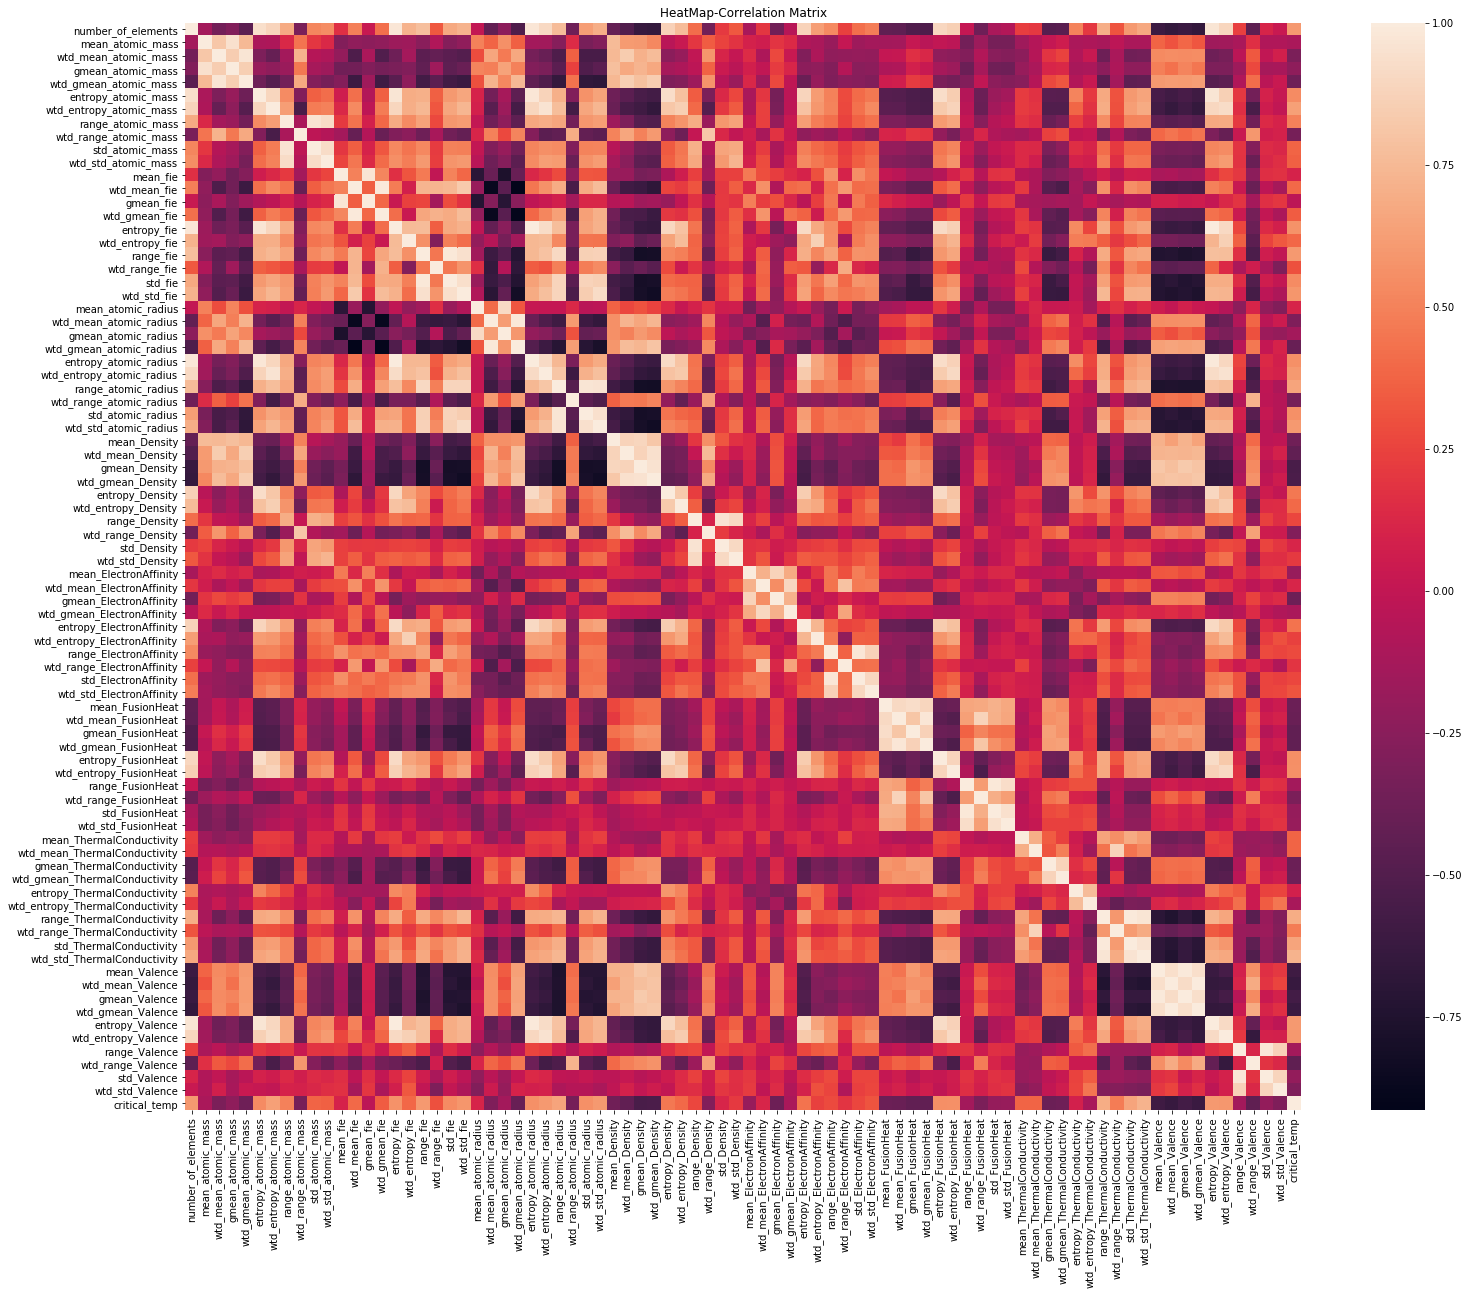

In [18]:
#heatmap - correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(df_t.corr(), annot=False)
plt.title('HeatMap-Correlation Matrix')

The code shown below shows the correlations of each variable with *critical_temp*; this is done so we can see exactly which features have the highest correlations with the response variable so that we can compare to the remaining variables after using LASSO for feature elimination. We would expect that the highest correlations (both positive and negative) would remain in the model, unless they are highly correlated with other similar features, in which case the other covariant features will be eliminated. The correlations are shown separately for the characteristic features and the elements list.

In [19]:
#check correlations with critical_temp - which  measurable characteristics are most indicative of high critical temp?
crit_temp_corrs = df_t.corr()['critical_temp']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(crit_temp_corrs.sort_values(ascending = True))

wtd_mean_Valence                  -0.632401
wtd_gmean_Valence                 -0.615653
mean_Valence                      -0.600085
gmean_Valence                     -0.573068
gmean_Density                     -0.541684
wtd_gmean_Density                 -0.540046
wtd_range_Valence                 -0.439901
wtd_mean_Density                  -0.433940
wtd_gmean_FusionHeat              -0.432365
gmean_FusionHeat                  -0.431795
wtd_gmean_atomic_radius           -0.405176
wtd_mean_FusionHeat               -0.394117
gmean_ThermalConductivity         -0.387192
mean_FusionHeat                   -0.385509
gmean_ElectronAffinity            -0.380568
wtd_gmean_ThermalConductivity     -0.371601
wtd_gmean_atomic_mass             -0.369858
mean_Density                      -0.368262
wtd_range_atomic_radius           -0.344100
wtd_range_atomic_mass             -0.337131
wtd_range_FusionHeat              -0.314178
wtd_mean_atomic_mass              -0.312272
wtd_std_Valence                 

In [20]:
#check element correlations with critical_temp - are there any particular elements that are highly prone to high critical temp?
crit_temp_corrs2 = df_m.corr()['critical_temp']
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(crit_temp_corrs2.sort_values(ascending = True))

S               -0.112922
Ce              -0.096802
Se              -0.088079
B               -0.086973
In              -0.086894
Pt              -0.083330
Fe              -0.081772
Os              -0.072878
Si              -0.072461
Ni              -0.072107
Ge              -0.069413
Zr              -0.068218
Nb              -0.064711
Ir              -0.063676
Lu              -0.060565
Rh              -0.059443
As              -0.058751
Mo              -0.057731
Sn              -0.055607
Li              -0.054923
Ru              -0.054653
N               -0.052955
K               -0.051720
Sb              -0.051528
Pd              -0.050823
Te              -0.050348
W               -0.050161
La              -0.048102
V               -0.047991
Ti              -0.046190
Na              -0.046086
P               -0.045618
Sc              -0.044490
Ga              -0.043691
Al              -0.043045
Co              -0.041648
C               -0.039554
Ta              -0.036342
H           

The code below creates new dataframes that separate the features from the response variable, *critical_temp*.

In [21]:
## X for explanatory variables and y for the response variable
y = df['critical_temp']
X = df.drop('critical_temp', axis=1)
print('Size of target vector: ', y.shape)
print('='*50)
print('Size of explanatory matrix: ',X.shape)

Size of target vector:  (21263,)
Size of explanatory matrix:  (21263, 158)


Before running any models, the data is set up for 10-fold cross validation using *cross_val_score*.

In [22]:
## Creating training and test data using kfold
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=10,shuffle=True,random_state=20)

for train, test in cv.split(X,y):
    X_train = X.iloc[train] 
    X_test  = X.iloc[test] 
    y_train = y[train]
    y_test  = y[test] 

### Feature Selection

The code for normalization of the data and initial variable selection using LASSO is shown below. The normalization step is done within the LASSO command. The hyperparameter *alpha* is tested across multiple values to determine what the best value for *alpha* will be in the LASSO algorithm.

In [23]:
lasso = Lasso( normalize = True) ### normalizing the data
alphas = 10**np.linspace(10,-2,100)*0.5

MSEL = pd.DataFrame(columns = ['Alpha', 'MSE'])

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train) 
    predL2 = lasso.predict(X_test) 
    mse = mean_squared_error(y_test, predL2)
    MSEL = MSEL.append({'Alpha': a , 'MSE': mse}, ignore_index=True)

    
print(np.shape(MSEL))
print('='*50)
print('Min Alpha and MSE: ', MSEL.min())

(100, 2)
Min Alpha and MSE:  Alpha      0.005000
MSE      349.223507
dtype: float64


Text(0.5, 1.0, 'MSE vs Shrinkage Factor')

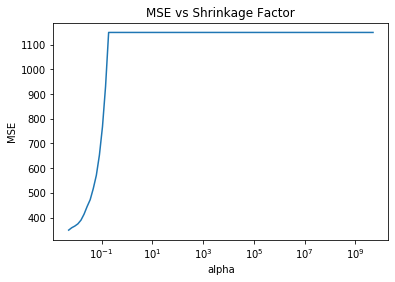

In [24]:
# Visualize the changes of MSE with respect to alpha
ax = plt.gca()
ax.plot(MSEL['Alpha'],MSEL['MSE'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs Shrinkage Factor')

LASSO is run using an *alpha* of .005.

In [25]:
# find the coefficient of lasso at alpha = 0.005 (min alpha)
lasso_final = Lasso( alpha = 0.005, normalize = True) 
lasso_final.fit(X_train, y_train) 
cf = lasso_final.coef_
Columns = X.columns
coeff = pd.DataFrame({'Coeff': cf, 'Column': list(Columns)}, columns=['Coeff', 'Column'])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(coeff) # Print coefficients and column names

         Coeff                           Column
0     0.000000               number_of_elements
1    -0.000000                 mean_atomic_mass
2    -0.000000             wtd_mean_atomic_mass
3    -0.000000                gmean_atomic_mass
4    -0.000000            wtd_gmean_atomic_mass
5     0.000000              entropy_atomic_mass
6    10.688277          wtd_entropy_atomic_mass
7     0.026893                range_atomic_mass
8    -0.005500            wtd_range_atomic_mass
9     0.000000                  std_atomic_mass
10   -0.000000              wtd_std_atomic_mass
11    0.007445                         mean_fie
12    0.000000                     wtd_mean_fie
13    0.000000                        gmean_fie
14    0.000000                    wtd_gmean_fie
15    0.000000                      entropy_fie
16    0.000000                  wtd_entropy_fie
17    0.002626                        range_fie
18    0.000000                    wtd_range_fie
19    0.000000                          

As shown above, many of the variables have resulting coefficients that are esentially zero. A threshold of .01 is used to eliminate any variables with small coefficients, and the remaining are used to create a new dataframe for use with RIDGE regression.

In [26]:
# Remove all coefficients which are less than 0.01
for c,f in zip(coeff.iloc[:, 0], coeff.iloc[:, 1]): 
    if abs(c) > .01:
        print(c,f)

10.688276921875563 wtd_entropy_atomic_mass
0.026893305793537353 range_atomic_mass
0.01899521566009303 range_atomic_radius
-0.10412966787045645 wtd_gmean_ElectronAffinity
-2.0697885420083697 wtd_entropy_ElectronAffinity
-0.10013027706829983 wtd_std_FusionHeat
0.10602954697510382 wtd_mean_ThermalConductivity
-0.07896278415380258 wtd_gmean_ThermalConductivity
1.478495352600494 entropy_ThermalConductivity
0.09628763349685594 wtd_std_ThermalConductivity
-8.078692401034354 wtd_std_Valence
0.03600230150978303 C
-1.3930686814488888 Si
-0.27840450031556596 S
-0.7320666899269579 Cl
4.0386866573744316 Ca
-0.30468008243835304 Ge
-1.069125947259099 As
1.7747759201460411 Sr
-2.0267089637101754 Ag
9.318034854405283 Ba
-4.59853866805461 Ce
-2.4733858438508194 Nd
7.050842288171133 Hg
3.8381670034275563 Tl
4.917095705023585 Bi


In [27]:
# create a new data frame with reduced features
df_new = df[['wtd_entropy_atomic_mass', 'range_atomic_mass', 'range_atomic_radius', 'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'wtd_std_FusionHeat', 'wtd_mean_ThermalConductivity', 
             'wtd_gmean_ThermalConductivity', 'entropy_ThermalConductivity', 'wtd_std_ThermalConductivity', 'wtd_std_Valence', 'C', 'Si', 'S', 'Cl', 'Ca', 'Ge', 'As', 'Sr', 'Ag', 'Ba', 'Ce', 'Nd', 
             'Hg', 'Tl', 'Bi', 'critical_temp']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wtd_entropy_atomic_mass        21263 non-null  float64
 1   range_atomic_mass              21263 non-null  float64
 2   range_atomic_radius            21263 non-null  int64  
 3   wtd_gmean_ElectronAffinity     21263 non-null  float64
 4   wtd_entropy_ElectronAffinity   21263 non-null  float64
 5   wtd_std_FusionHeat             21263 non-null  float64
 6   wtd_mean_ThermalConductivity   21263 non-null  float64
 7   wtd_gmean_ThermalConductivity  21263 non-null  float64
 8   entropy_ThermalConductivity    21263 non-null  float64
 9   wtd_std_ThermalConductivity    21263 non-null  float64
 10  wtd_std_Valence                21263 non-null  float64
 11  C                              21263 non-null  float64
 12  Si                             21263 non-null 

If we return to the original heatmap of correlations, but this time with the reduced dataset, we can see less correlation between the features, indicating some reduction of less important variables and in the covariance of the data used to predict *critical_temp*. There are some features remaining with high correlations with each other, so this could be a good place to make some additional manual adjustments by removing more of them, but we first run the model with Ridge without additional adjustments to observe the performance of using it successively to the LASSO algorithm.

Text(0.5, 1, 'HeatMap-Correlation Matrix')

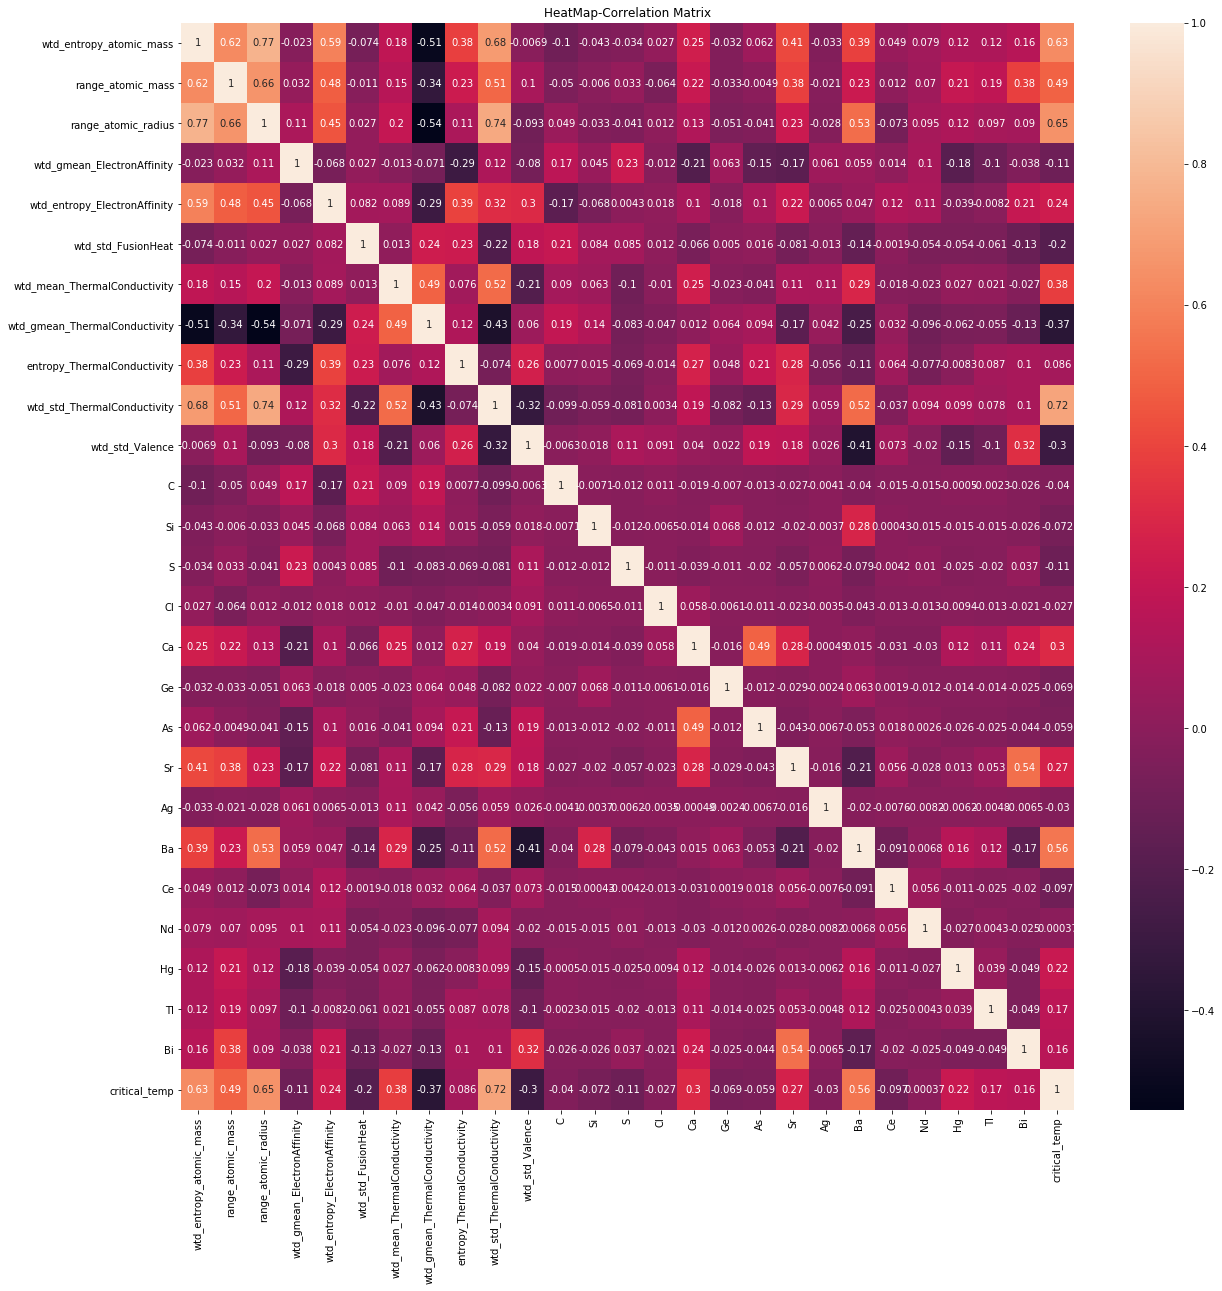

In [28]:
#heatmap - correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(df_new.corr(), annot=True)
plt.title('HeatMap-Correlation Matrix')

### Apply Ridge Regularization to Linear Regression 

The code below uses Ridge regression to predict *critical_temp* on the new reduced dataset. Normalization is again performed as an option within the regression code, and then the best value for the hyperparameter *alpha* for Ridge regression is determined before finally running the model with the optimized parameters.

In [29]:
## X_new for explanatory variables and y_new for the response variable
y_new = df_new['critical_temp']
X_new = df_new.drop('critical_temp', axis=1)
print('Size of target vector: ', y_new.shape)
print('='*50)
print('Size of explanatory matrix: ',X_new.shape)

## Creating new traing and test data using kfold
cv = KFold(n_splits=10,shuffle=True,random_state=18)

for train, test in cv.split(X,y):
    X_train_new = X_new.iloc[train] 
    X_test_new  = X_new.iloc[test] 
    y_train_new = y_new[train]
    y_test_new  = y_new[test] 

Size of target vector:  (21263,)
Size of explanatory matrix:  (21263, 26)


In [30]:
## Using Ridge Regression 
ridge = Ridge(normalize = True) ### normalizing the data
alphas = 10**np.linspace(10,-2,100)*0.5
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train_new, y_train_new)
    coefs.append(ridge.coef_)
    
np.shape(coefs)


(100, 26)

Text(0, 0.5, 'weights')

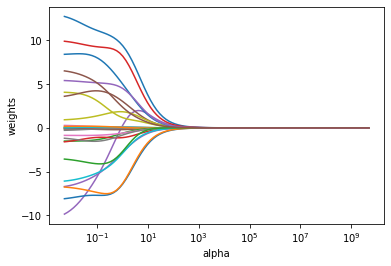

In [31]:
## We expect the coefficient estimates to be much smaller, in terms of  l2  norm, when a large value of alpha is used is used.
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [32]:
# iterating multiple values of alphs to find the minimum MSE
MSE_ridge = pd.DataFrame(columns = ['Alpha', 'MSE'])

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train_new, y_train_new) 
    pred_ridge = ridge.predict(X_test_new) 
    mse_ridge = mean_squared_error(y_test_new, pred_ridge)
    MSE_ridge = MSE_ridge.append({'Alpha': a , 'MSE': mse_ridge}, ignore_index=True)

    
print(np.shape(MSE_ridge))
print('='*50)
print('Minimum Alpha and MSE: ', '\n', MSE_ridge.min())

(100, 2)
Minimum Alpha and MSE:  
 Alpha      0.005000
MSE      343.541729
dtype: float64


Text(0.5, 1.0, 'MSE vs Alpha for Ridge')

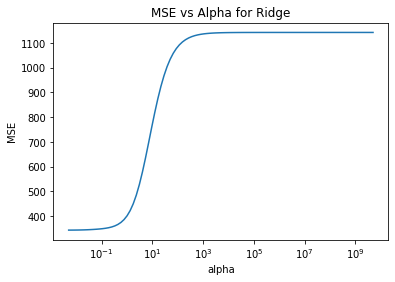

In [33]:
## Visualize the data MSE with respect to Alpha
ax = plt.gca()
ax.plot(MSE_ridge['Alpha'],MSE_ridge['MSE'])
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs Alpha for Ridge')

### Final Coefficients after optimizing the Ridge regularization 

In [34]:
# find the coefficient of Ridge Linear Regression at alpha = 0.005 (min alpha)
Final_model = Ridge( alpha = 0.005, normalize = True) 
Final_model.fit(X_train_new, y_train_new) 
cf_final = Final_model.coef_
Columns_final = X_new.columns
coeff_final = pd.DataFrame({'Coeff': cf_final, 'Column': list(Columns_final)}, columns=['Coeff', 'Column'])
print(coeff_final) # Print coefficients and column names

        Coeff                         Column
0   12.731542        wtd_entropy_atomic_mass
1    0.032923              range_atomic_mass
2    0.056247            range_atomic_radius
3   -0.107330     wtd_gmean_ElectronAffinity
4   -9.861204   wtd_entropy_ElectronAffinity
5   -0.115258             wtd_std_FusionHeat
6    0.279294   wtd_mean_ThermalConductivity
7   -0.281721  wtd_gmean_ThermalConductivity
8    4.065364    entropy_ThermalConductivity
9   -0.002733    wtd_std_ThermalConductivity
10  -8.099339                wtd_std_Valence
11   0.163938                              C
12  -1.512143                             Si
13  -1.597723                              S
14  -6.708782                             Cl
15   3.605658                             Ca
16  -0.861738                             Ge
17  -1.190164                             As
18   0.923461                             Sr
19  -6.087170                             Ag
20   8.403298                             Ba
21  -6.766

In [38]:
# p-values and summary statistics 
print("\n=========== SUMMARY ===========")
xlabels = X_train_new.columns
stats.summary(Final_model, X_train_new, y_train_new, xlabels)


=========== SUMMARY ===========
Residuals:
      Min       1Q  Median     3Q      Max
-208.6094 -10.9185  0.1687 9.4136 148.1172


Coefficients:
                                Estimate  Std. Error  t value   p value
_intercept                      6.381481    0.661809   9.6425  0.000000
wtd_entropy_atomic_mass        12.731542    0.745056  17.0880  0.000000
range_atomic_mass               0.032923    0.002830  11.6339  0.000000
range_atomic_radius             0.056247    0.002923  19.2449  0.000000
wtd_gmean_ElectronAffinity     -0.107330    0.003437 -31.2271  0.000000
wtd_entropy_ElectronAffinity   -9.861204    0.685702 -14.3812  0.000000
wtd_std_FusionHeat             -0.115258    0.020279  -5.6835  0.000000
wtd_mean_ThermalConductivity    0.279294    0.006988  39.9649  0.000000
wtd_gmean_ThermalConductivity  -0.281721    0.007812 -36.0603  0.000000
entropy_ThermalConductivity     4.065364    0.563843   7.2101  0.000000
wtd_std_ThermalConductivity    -0.002733    0.004759  -0.5743 

### References

[1] http://www.superconductors.org/History.htm